# Klasifikasi Level Kemacetan Lalu Lintas Kota Bekasi

# Latar Belakang

Kepadatan lalu lintas yang tinggi dapat menyebabkan kemacetan dan menimbulkan dampak negatif seperti peningkatan waktu tempuh, peningkatan polusi udara, dan lain sebagainya, tak terkecuali di Kota Bekasi yang merupakan kawasan industri sehingga kepadatan lalu lintas terus meningkat. Dalam upaya mengatasi permasalahan tersebut, pemerintah Kota Bekasi perlu mengembangkan sistem klasifikasi level kepadatan lalu lintas dengan menggunakan teknologi yang ada. Sistem ini dapat membantu pengguna jalan dalam menentukan rute perjalanan yang lebih efisien dan mengurangi kemacetan lalu lintas di jalan-jalan utama Kota Bekasi.

Sistem klasifikasi level kepadatan lalu lintas Kota Bekasi dibuat menggunakan data user generated data program Waze for Cities. Data-data tersebut diolah dengan menggunakan teknik analisis data dan machine learning sehingga dapat menghasilkan informasi mengenai tingkat kepadatan lalu lintas di setiap wilayah Kota Bekasi. Dengan adanya sistem ini, diharapkan dapat membantu meningkatkan kualitas hidup masyarakat Kota Bekasi dan mengurangi dampak negatif yang diakibatkan oleh kepadatan lalu lintas yang tinggi.

In [1]:
import pandas as pd

In [2]:
#import data
data = pd.read_csv('aggregate_median_jams_Kota Bekasi.csv')

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,0.0,2022-07-06 00:00:00.000,32.75,KOTA BEKASI,Arah Tol Lingkar Dalam/Cawang/Jakarta,4,585.0,176.0,10.260000,11,33478521,2022-07-06,4.0,"MULTILINESTRING ((106.964686 -6.254475, 106.96..."
1,1,1.0,2022-07-06 00:00:00.000,32.75,KOTA BEKASI,Trans Yogi,2,1809.0,78.0,27.080000,8,33478540,2022-07-06,2.0,"MULTILINESTRING ((106.923993 -6.381096, 106.92..."
2,2,2.0,2022-07-06 00:00:00.000,32.75,KOTA BEKASI,Tol Lingkar Luar (Cikunir-TMII),3,910.0,198.0,13.230000,5,33478539,2022-07-06,3.0,"MULTILINESTRING ((106.959264 -6.284605, 106.95..."
3,3,3.0,2022-07-06 00:00:00.000,32.75,KOTA BEKASI,Tol Lingkar Luar (Cikunir-TMII),1,3459.0,99.5,47.114998,14,33478537,2022-07-06,1.0,"MULTILINESTRING ((106.958044 -6.261638, 106.95..."
4,4,4.0,2022-07-06 00:00:00.000,32.75,KOTA BEKASI,Tol Cikampek (Cikunir-Cikarang),2,994.0,108.0,21.400000,25,33478534,2022-07-06,2.0,"MULTILINESTRING ((106.968834 -6.252266, 106.96..."


# Data Understanding

Dataset yang digunakan pada project ini adalah crowdsourced/user generated data program Waze for Cities dari Waze. Tabel agregat tersebut memiliki rentang waktu 6 Juli 2022 hingga 6 September 2022.

1. Time : time (every hour)

2. kemendagri_kabupaten_kode : Kemendagri code of cities

3. kemendagri_kabupaten_nama : Kemendagri name of cities

4. Street : street name

5. Level : traffic congestion level

6. Median_length : jam length in meters

7. Median_delay : delay of jam (in seconds) compared to free flow speed (in case of block, -1)

8. Median_speed_kmh : current median speed on jammed segments in km/h

9. Total_records :total data recorded in a given time

10. Id : Row ID

11. Date : Date

12. Geometry : geometry data type (spatial data)

In [4]:
data.shape

(240261, 15)

In [5]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level
count,240261.000000,127132.000000,240261.00,240261.000000,240261.000000,240261.000000,240261.000000,240261.000000,2.402610e+05,240261.000000
mean,40292.785999,35081.994706,32.75,2.513783,740.150882,139.408841,12.101552,18.792097,3.537875e+07,2.513783
std,36892.787019,23142.448534,0.00,1.028050,592.275226,124.047799,7.331238,29.136895,1.096479e+06,1.028050
min,0.000000,0.000000,32.75,1.000000,11.000000,-1.000000,0.000000,1.000000,3.347852e+07,1.000000
25%,11262.000000,15891.000000,32.75,2.000000,377.000000,75.000000,6.500000,4.000000,3.444555e+07,2.000000
50%,25182.000000,31782.500000,32.75,2.000000,621.000000,99.000000,11.160000,10.000000,3.534292e+07,2.000000
75%,67066.000000,52263.250000,32.75,3.000000,974.000000,154.000000,16.610000,22.000000,3.632196e+07,3.000000
max,127131.000000,84046.000000,32.75,5.000000,15551.000000,3777.500000,61.180000,900.000000,3.728765e+07,5.000000


In [6]:
data.dtypes

Unnamed: 0.1                   int64
Unnamed: 0                   float64
time                          object
kemendagri_kabupaten_kode    float64
kemendagri_kabupaten_nama     object
street                        object
level                          int64
median_length                float64
median_delay                 float64
median_speed_kmh             float64
total_records                  int64
id                             int64
date                          object
median_level                 float64
geometry                      object
dtype: object

# Preprocessing Data

In [7]:
#Ubah tipe data menjadi datetime
data['time'] = pd.to_datetime(data['time'], format= '%Y-%m-%d %H:%M:%S')
data['date'] = pd.to_datetime(data['date'], format= '%Y-%m-%d')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240261 entries, 0 to 240260
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0.1               240261 non-null  int64         
 1   Unnamed: 0                 127132 non-null  float64       
 2   time                       240261 non-null  datetime64[ns]
 3   kemendagri_kabupaten_kode  240261 non-null  float64       
 4   kemendagri_kabupaten_nama  240261 non-null  object        
 5   street                     236149 non-null  object        
 6   level                      240261 non-null  int64         
 7   median_length              240261 non-null  float64       
 8   median_delay               240261 non-null  float64       
 9   median_speed_kmh           240261 non-null  float64       
 10  total_records              240261 non-null  int64         
 11  id                         240261 non-null  int64   

In [9]:
#ekstrak informasi dari kolom time

data["DayOfWeek"] = data["time"].dt.weekday # Ekstrak day of week
data["Month"] = data["time"].dt.month # Ekstrak month
data["WeekOfYear"] = data["time"].dt.isocalendar().week # Ekstrak week of year
data["Hour"] = data["time"].dt.hour
data.head()

,Unnamed: 0.1,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,DayOfWeek,Month,WeekOfYear,Hour
0,0,0.0,2022-07-06,32.75,KOTA BEKASI,Arah Tol Lingkar Dalam/Cawang/Jakarta,4,585.0,176.0,10.260000,11,33478521,2022-07-06,4.0,"MULTILINESTRING ((106.964686 -6.254475, 106.96...",2,7,27,0
1,1,1.0,2022-07-06,32.75,KOTA BEKASI,Trans Yogi,2,1809.0,78.0,27.080000,8,33478540,2022-07-06,2.0,"MULTILINESTRING ((106.923993 -6.381096, 106.92...",2,7,27,0
2,2,2.0,2022-07-06,32.75,KOTA BEKASI,Tol Lingkar Luar (Cikunir-TMII),3,910.0,198.0,13.230000,5,33478539,2022-07-06,3.0,"MULTILINESTRING ((106.959264 -6.284605, 106.95...",2,7,27,0
3,3,3.0,2022-07-06,32.75,KOTA BEKASI,Tol Lingkar Luar (Cikunir-TMII),1,3459.0,99.5,47.114998,14,33478537,2022-07-06,1.0,"MULTILINESTRING ((106.958044 -6.261638, 106.95...",2,7,27,0
4,4,4.0,2022-07-06,32.75,KOTA BEKASI,Tol Cikampek (Cikunir-Cikarang),2,994.0,108.0,21.400000,25,33478534,2022-07-06,2.0,"MULTILINESTRING ((106.968834 -6.252266, 106.96...",2,7,27,0


In [10]:
# Unique values for each feature
data.nunique().sort_values()

kemendagri_kabupaten_kode         1
kemendagri_kabupaten_nama         1
Month                             3
level                             5
median_level                      5
DayOfWeek                         7
WeekOfYear                       10
Hour                             24
date                             62
total_records                   284
street                         1275
time                           1435
median_delay                   2142
median_length                  4535
median_speed_kmh              10388
Unnamed: 0                    84047
Unnamed: 0.1                 127132
geometry                     195871
id                           240261
dtype: int64

In [11]:
data.isnull().sum()

Unnamed: 0.1                      0
Unnamed: 0                   113129
time                              0
kemendagri_kabupaten_kode         0
kemendagri_kabupaten_nama         0
street                         4112
level                             0
median_length                     0
median_delay                      0
median_speed_kmh                  0
total_records                     0
id                                0
date                              0
median_level                      0
geometry                          0
DayOfWeek                         0
Month                             0
WeekOfYear                        0
Hour                              0
dtype: int64

terdapat kolom dengan nilai null, yaitu kolom unamed dan kolom street. Kolom unamed sendiri sebenarnya hanya penomoran indeks dan kolom street adalah kolom nama jalan yang tidak akan dipakai sebagai feature pelatihan dan akan dihapus. Jadi, tidak ada tindakan lebih lanjut untuk handling nilai null tersebut.

In [12]:
# Menghapus Beberapa kolom
data.drop(["kemendagri_kabupaten_kode", "kemendagri_kabupaten_nama", "street", "id", "geometry", "date", "time"], axis = 1, inplace = True)

In [13]:
# Separate into target and features
target = "level"
features = [i for i in data.columns if i not in [target]] #store all features name 
print(features)

['Unnamed: 0.1', 'Unnamed: 0', 'median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'median_level', 'DayOfWeek', 'Month', 'WeekOfYear', 'Hour']


In [14]:
# Separate features into categorical and numerical

categorical_features = []
numerical_features = []
threshold = 100 # This is just an estimation, a categorial feature is likely to have less than 100 unique values

for feature in features:
    if data[feature].nunique() <= threshold:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

print("The Dataset has {} numerical & {} categorical features.".format(len(categorical_features),len(numerical_features)))
print("Numerical features are {}".format(numerical_features))
print("Categorical features are {}".format(categorical_features))

The Dataset has 5 numerical & 6 categorical features.
Numerical features are ['Unnamed: 0.1', 'Unnamed: 0', 'median_length', 'median_delay', 'median_speed_kmh', 'total_records']
Categorical features are ['median_level', 'DayOfWeek', 'Month', 'WeekOfYear', 'Hour']


# Exploratory Data Analysis

In [15]:
# Change font size for ticks
def bigger_ticks_font_size(ax):
    ax.tick_params(axis = "x", labelsize = 13)
    ax.tick_params(axis = "y", labelsize = 13)

# Change font size for labels
def bigger_label_font_size(ax, xlabel_name, ylabel_name):
    ax.set_xlabel(xlabel_name, fontsize = 16)
    ax.set_ylabel(ylabel_name, fontsize = 16)

# Create a new color palette consisted of the extracted hex codes from Set2 palette and other additional colors
palette = ["#fc8d62", "#ffd92f", "#e5c494", "#b3b3b3", "#66c2a5", "#96b9d0", "#8da0cb", "#ce94bc", "#eba7ac", "#f5ae52"]

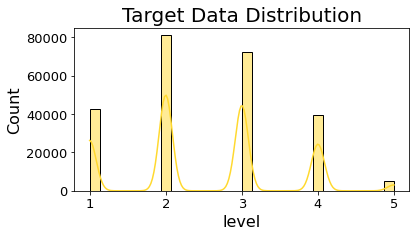

In [16]:
#plotting label level data distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[6,3])
ax = sns.histplot(data["level"], color ="#ffd92f", kde = True, bins = 30)

plt.title("Target Data Distribution", fontsize = 20)
bigger_ticks_font_size(ax)
bigger_label_font_size(ax, "level", "Count")

plt.show()

Text(0.5, 1.0, 'Median Length Data Distribution')

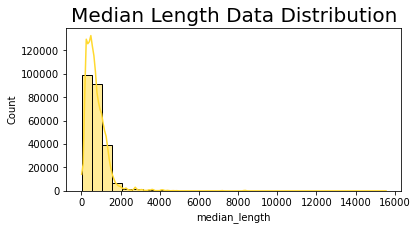

In [17]:
#plotting label median length data distribution
plt.figure(figsize=[6,3])
ax = sns.histplot(data["median_length"], color ="#ffd92f", kde = True, bins = 30)

plt.title("Median Length Data Distribution", fontsize = 20)

Text(0.5, 1.0, 'Median Delay Data Distribution')

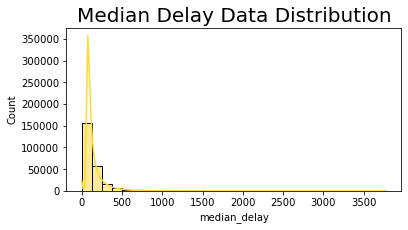

In [18]:
#plotting label median delay data distribution
plt.figure(figsize=[6,3])
ax = sns.histplot(data["median_delay"], color ="#ffd92f", kde = True, bins = 30)

plt.title("Median Delay Data Distribution", fontsize = 20)

Text(0.5, 1.0, 'Median Speed Kmh Data Distribution')

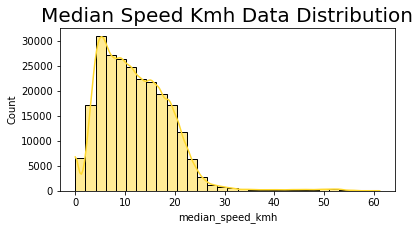

In [19]:
#plotting label median speed Kmh data distribution
plt.figure(figsize=[6,3])
ax = sns.histplot(data["median_speed_kmh"], color ="#ffd92f", kde = True, bins = 30)

plt.title("Median Speed Kmh Data Distribution", fontsize = 20)

In [20]:
# Function to plot categorical features using countplot
def countplot_categorical_feature(col_name, title, palette, order = None):
    ax = sns.countplot(x = data[col_name], order = order, palette = palette)
    plt.suptitle("'{}' Feature Distribution".format(title), fontsize = 20)
    #plt.suptitle("Annual Sales during 2010-2012", fontsize = 20)
    bigger_ticks_font_size(ax)
    bigger_label_font_size(ax, title, "Count")

# Function to annotate frequency of each category in barplot
def annotate_barplot (ax, data):
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate("{:.1f}%".format(100.*y/data), (x.mean(), y), 
            ha = "center", va = "bottom", fontsize = 12) # set the alignment of the text

# Set double axes, count axis is on right, frequency on left
def set_double_axes(ax1, ax2, data, ax1_ax2_xlabel, ax1_ylabel, ax2_ylabel):
    ax2.yaxis.tick_left()
    ax1.yaxis.tick_right()

    # Also switch the labels over
    ax1.yaxis.set_label_position("right")
    ax2.yaxis.set_label_position("left")

    annotate_barplot (ax1, len(data)) #annotate barplot

    # Use a LinearLocator to ensure the correct number of ticks
    ax1.yaxis.set_major_locator(LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax1.set_ylim(0,len(data))

    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(MultipleLocator(10))

    # Change font size for ticks and label
    bigger_ticks_font_size(ax1)
    bigger_ticks_font_size(ax2)
    bigger_label_font_size(ax1, ax1_ax2_xlabel, ax1_ylabel)
    bigger_label_font_size(ax2, ax1_ax2_xlabel, ax2_ylabel)

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

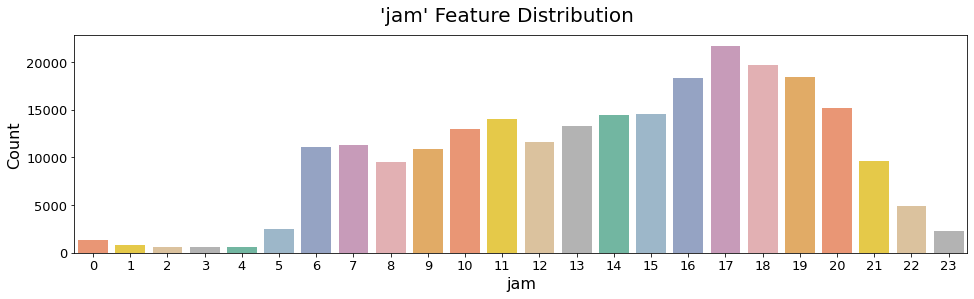

In [21]:
#plotting label jam data distribution
plt.figure(figsize=(16,4))
countplot_categorical_feature("Hour", "jam", palette)

Record data menunjukkan jumlah kendaraan berdistribusi secara normal dimana kepadatan kendaraan akan terus meningkat seiring bertambahnya jam dan berada di titik puncak pada jam 17 atau 5 sore dan mengalami penurunan kembali kepadatannya setelah jam 5 sore.

<AxesSubplot:xlabel='level', ylabel='median_speed_kmh'>

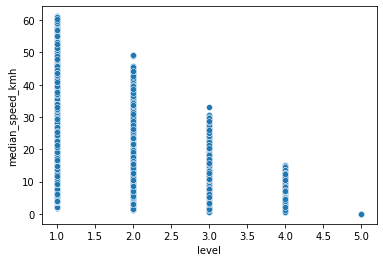

In [22]:
sns.scatterplot(data=data, x='level', y='median_speed_kmh')

Hasil visualisasi menunjukkan bahwa semakin tinggi level kepadatan lalu lintasnya, maka persebaran kecepatan median pada segmen tersebut juga cenderung mengalami penurunan

<AxesSubplot:xlabel='level', ylabel='median_length'>

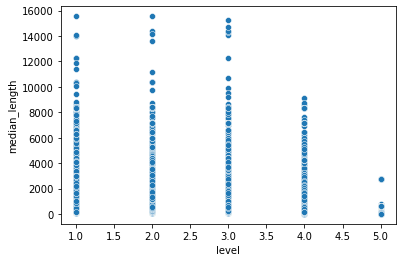

In [23]:
sns.scatterplot(data=data, x='level', y='median_length')

Hasil visualisasi menunjukkan bahwa semakin tinggi level kepadatan lalu lintasnya, maka persebaran median length pada segmen tersebut juga cenderung mengalami penurunan

<AxesSubplot:xlabel='level', ylabel='median_delay'>

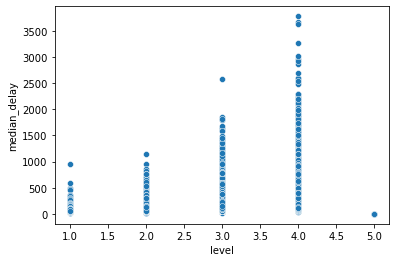

In [24]:
sns.scatterplot(data=data, x='level', y='median_delay')

Hasil visualisasi menunjukkan bahwa semakin tinggi level kepadatan lalu lintasnya, maka persebaran median delaynya cenderung semakin tinggi

<AxesSubplot:xlabel='median_length'>

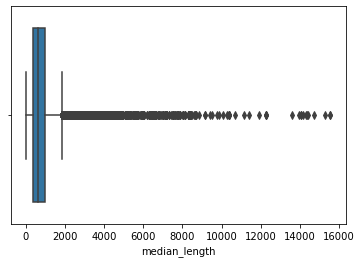

In [25]:
# Melihat outlier 'median_length'
sns.boxplot(x=data['median_length'])

<AxesSubplot:xlabel='median_delay'>

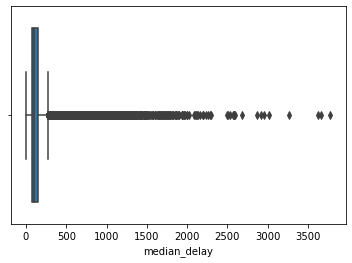

In [26]:
# Melihat outlier 'median_delay'
sns.boxplot(x=data['median_delay'])

<AxesSubplot:xlabel='median_speed_kmh'>

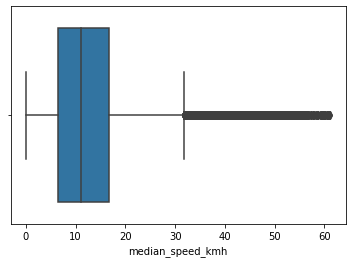

In [27]:
# Melihat outlier 'median_delay'
sns.boxplot(x=data['median_speed_kmh'])

In [28]:
# Function menghapus outlier
def remove_outlier(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  df_hasil = data[~((data < (q1-1.5*iqr)) | (data > (q3+1.5*iqr)))]
  return df_hasil

In [29]:
# menghapus outlier
df_remove = remove_outlier(data[['median_delay', 'median_length', 'median_speed_kmh']])
df_remove.dropna(axis=0, inplace=True)

df_remove

,median_delay,median_length,median_speed_kmh
0,176.0,585.0,10.260
1,78.0,1809.0,27.080
2,198.0,910.0,13.230
4,108.0,994.0,21.400
6,184.0,1724.0,23.265
...,...,...,...
240253,142.5,1317.5,23.450
240254,230.5,1497.0,15.775
240256,-1.0,33.0,0.000
240257,158.0,1680.5,25.945


# Modelling

In [30]:
X = data.loc[:, ['median_length', 'median_delay', 'median_speed_kmh']]
y = data['level']

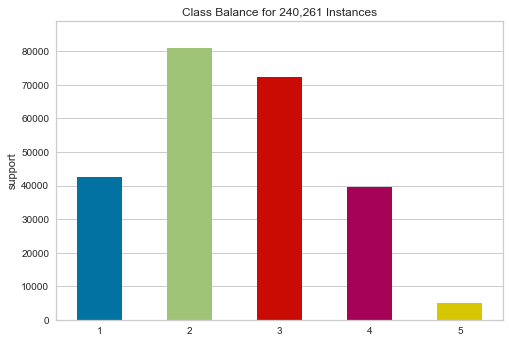

<AxesSubplot:title={'center':'Class Balance for 240,261 Instances'}, ylabel='support'>

In [31]:
# cek proporsi proporsi persebaran level kemacetan
from yellowbrick.target import ClassBalance
check_proporsi = ClassBalance()
check_proporsi.fit(y)
check_proporsi.show()

In [32]:
# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Karena persebaran kolom target tidak balance dan dapat menyebabkan underfitting, maka dilakukan oversampling supaya persebaran kolom target menjadi balance.

In [33]:
# apply SMOTE oversampling to training data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

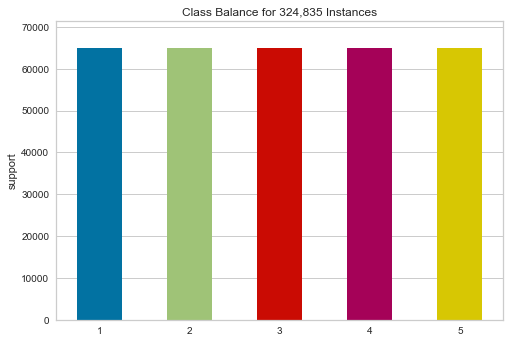

<AxesSubplot:title={'center':'Class Balance for 324,835 Instances'}, ylabel='support'>

In [34]:
# cek proporsi persebaran level kemacetan setelah dilakukan oversampling
check_proporsi = ClassBalance()
check_proporsi.fit(y_train_resampled)
check_proporsi.show()

In [35]:
# Train the random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predict the test set labels
y_pred_rfc = rfc.predict(X_test)

In [37]:
# Train the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred_knn = knn.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
#RFC
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

print(cm_rfc)

[[ 7240  1209    24     6     0]
 [ 1397 13503  1121    20     0]
 [   54  1572 12068   840     0]
 [   11    70   986  6928     0]
 [    0     0     0     0  1004]]


In [40]:
#KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[ 6967  1481    29     2     0]
 [ 1616 12898  1483    44     0]
 [   86  1665 11507  1276     0]
 [   14    76  1300  6605     0]
 [    0     0     0     0  1004]]


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

precision_rfc = precision_score(y_test, y_pred_rfc,
                                average='micro')
precision_knn = precision_score(y_test, y_pred_knn,
                                average='micro')

recall_rfc = recall_score(y_test, y_pred_rfc,
                          average='micro')
recall_knn = recall_score(y_test, y_pred_knn,
                          average='micro')

f1_rfc = f1_score(y_test, y_pred_rfc,
                  average='micro')
f1_knn = f1_score(y_test, y_pred_knn,
                  average='micro')

# Evaluasi Model

Random Forest

In [42]:
print("Accuracy RFC:", accuracy_rfc)
print("Precision RFC:", precision_rfc)
print("Recall RFC:", recall_rfc)
print("f1 RFC:", f1_rfc)

Accuracy RFC: 0.8478763032484965
Precision RFC: 0.8478763032484965
Recall RFC: 0.8478763032484965
f1 RFC: 0.8478763032484966


KNN

In [43]:
print("Accuracy KNN:", accuracy_knn)
print("Precision KNN:", precision_knn)
print("Recall KNN:", recall_knn)
print("f1 RFC:", f1_knn)

Accuracy KNN: 0.8112084573283666
Precision KNN: 0.8112084573283666
Recall KNN: 0.8112084573283666
f1 RFC: 0.8112084573283666


# Kesimpulan

Berdasarkan hasil modelling yang dilakukan, dapat disimpulkan bahwa hasil model dengan menggunakan algoritma Random Forest memiliki tingkat akurasi yang lebih tinggi dibandingkan dengan algoritma KNN dimana akurasi hasil model menggunakan algoritma Random FOrest sebesar 84% dan akurasi hasil model algoritma KNN sebesar 81%.